# Capstone Report



The data set chosen is Austin TX Restaurant Inspection Scores for 2014-2017.

This data set was gathered from the data.austintexas.gov website and it covers restaurant inspection scores for the last 3 years. The data is given freely by the city of Austin with no restrictions on use. One note about this data set is that it is a rolling 3 year calendar of available scores and so the data for the begining half of 2014 was not included in the set gathered.  

Restaurant inspection scores were chosen to give us real world insight into the health, cleanliness, and sanitation practices of Austin restaurants. Scores accumulated over time reveal larger patterns, usually indicating well run, or not-so-well run, restaurants. The significance of knowing the health inspection scores is important to consumers because the general public is typically not allowed into the production or storage area of any given restaurant and therefor cannot validate for themselves the sanitation or cleanliness of said establishment. The restaurant inspection scores, which are public knowledge, give the lay man an indication of if that restaurant runs a sanitary establishment or not. A few things to note about how these scores are acheived from the Austintexas.gov website. "If no violations are found, a score of 100 is achieved. If more than 30 points are lost, a re-inspection is required and corrections must be made to bring the score above 70, in accordance with the Texas Food Establishment Rules. If subsequent inspections score below 70, compliance actions will be taken."

A note on sample vs population and this report. Normally, a sample of any population is taken when gathering data because to poll all members of a population is usually prohibitively expensive and/or probibitively difficult. This is not the case with health inspection scores. The state of Texas requires all food establishments maintain a liscense with the state in order to stay open for business. This requirement works in our favor, allowing us to use the entire restaurant population as our data set instead of a representative sample. Austin is also still a small enough city that the total number of restaurants is not very large.

The three questions are answered with this data set:
- What is the percentage of failed restaurants per year?
- What is the average score of all passing restaurants in Austin per year? 
- Are there restaurants that have failed more than once in each year?

In [41]:
# First, set up my working environment.
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from datetime import datetime 
from collections import Counter
%matplotlib inline 


In [5]:
# I input the raw data and then check the column names, 
# so I can correctly call them later. 
res_df = pd.read_csv('Restaurant_Inspection_Scores.csv')
list(res_df.columns.values)

['Restaurant Name',
 'Zip Code',
 'Inspection Date',
 'Score',
 'Address',
 'Facility ID',
 'Process Description']

In [6]:
# Next is to check what the first few lines look like.
res_df.head()


,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description
0,183 Grill Austin Gyros,78729,01/28/2016,95,"13729 N US 183 HWY NB Unit 890\nAUSTIN, TX 787...",11368998,Routine Inspection
1,183 Grill Austin Gyros,78729,04/10/2017,95,"13729 N US 183 HWY NB Unit 890\nAUSTIN, TX 787...",11368998,Routine Inspection
2,183 Grill Austin Gyros,78729,08/08/2016,95,"13729 N US 183 HWY NB Unit 890\nAUSTIN, TX 787...",11368998,Routine Inspection
3,15th Street Cafe,78701,11/10/2015,86,"303 W 15TH ST\nAUSTIN, TX 78701\n(30.277693, -...",2801033,Routine Inspection
4,2 Dine 4 Fine Catering,78702,05/18/2015,87,"3008 GONZALES ST\nAUSTIN, TX 78702\n(30.259363...",2802035,Routine Inspection


# Exploring the data

Now that I've seen the first few lines of my data frame, time to explore the data.  First, lets review the distribution of scores for the entire data set. This will tell me which scores occur most often. 

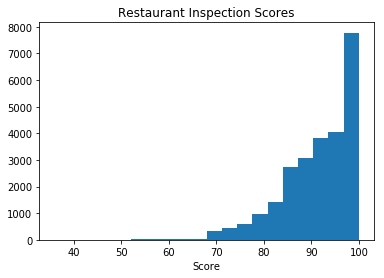

In [42]:
score = res_df['Score']
plt.title('Restaurant Inspection Scores')
plt.xlabel('Score')
plt.hist(score, bins=20)
plt.show()

The histogram for the entire data set reveals nearly all of the scores are passing scores. Of those passing scores, a great majority of them were at or near 100. 

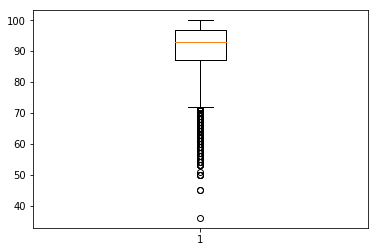

In [43]:
plt.boxplot(score)
plt.show()

The boxplot revealed some outliers. One with a score of 36! But how many individual restaurants are in the data set? 

In [57]:
# Check to see the number of unique restaurant names that occur in the dataframe
restaurants = res_df['Restaurant Name'].unique()
len(restaurants)

4499

In [40]:
# change the inspection date to a datetime object to more easily add a month and year column
pd.to_datetime(res_df['Inspection Date']); 

In [11]:
# Adding a month and year column to the data frame and checking the first 5 lines
res_df['year'] = pd.DatetimeIndex(res_df['Inspection Date']).year
res_df['month'] = pd.DatetimeIndex(res_df['Inspection Date']).month
res_df.head() 

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description,year,month
0,183 Grill Austin Gyros,78729,01/28/2016,95,"13729 N US 183 HWY NB Unit 890\nAUSTIN, TX 787...",11368998,Routine Inspection,2016,1
1,183 Grill Austin Gyros,78729,04/10/2017,95,"13729 N US 183 HWY NB Unit 890\nAUSTIN, TX 787...",11368998,Routine Inspection,2017,4
2,183 Grill Austin Gyros,78729,08/08/2016,95,"13729 N US 183 HWY NB Unit 890\nAUSTIN, TX 787...",11368998,Routine Inspection,2016,8
3,15th Street Cafe,78701,11/10/2015,86,"303 W 15TH ST\nAUSTIN, TX 78701\n(30.277693, -...",2801033,Routine Inspection,2015,11
4,2 Dine 4 Fine Catering,78702,05/18/2015,87,"3008 GONZALES ST\nAUSTIN, TX 78702\n(30.259363...",2802035,Routine Inspection,2015,5


With a 'year' column we can divide the data into different sets and compare them. First, check approximately how large each data frame will be when divided by year. 

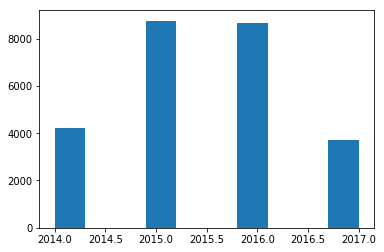

In [44]:
plt.hist(res_df['year'])
plt.show()

As expected, there are about half as many entries for 2017 and 2014 as there are for 2015 and 2016. This is consistent with the way a rolling calendar works, as dates past 3 years old drop off. Next is to take a look at what the scores for each year are. Even though we do not have a complete data set for 2014 or 2017, we can still look and see where the scores we do have fall. 

In [13]:
# Separating the data frame into the different years
year_2017 = res_df[res_df['year'] == 2017]
year_2016 = res_df[res_df['year'] == 2016]
year_2015 = res_df[res_df['year'] == 2015]
year_2014 = res_df[res_df['year'] == 2014]


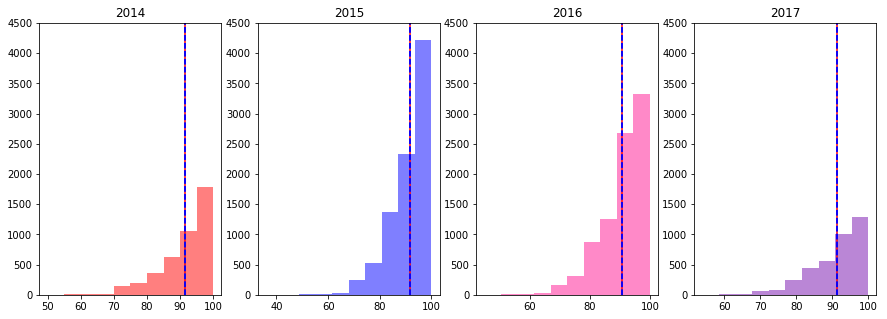

In [14]:
# Showing scores by year, with the mean and standard deviation plotted for each year
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.hist(year_2014['Score'], color='red', alpha=.5)
plt.ylim(0, 4500)
mean2014 = np.mean(year_2014['Score'])
st_dev2014 = np.std(mean2014)
plt.axvline(x=mean2014, color='red')
plt.axvline(x=(mean2014 + st_dev2014), color='blue', linestyle='--')
plt.axvline(x=(mean2014 - st_dev2014), color='blue', linestyle='--')
plt.title('2014')

plt.subplot(1, 4, 2)
plt.hist(year_2015['Score'], color='blue', alpha=.5)
plt.ylim(0, 4500)
mean2015 = np.mean(year_2015['Score'])
st_dev2015 = np.std(mean2015)
plt.axvline(x=mean2015, color='red')
plt.axvline(x=(mean2015 + st_dev2015), color='blue', linestyle='--')
plt.axvline(x=(mean2015 - st_dev2015), color='blue', linestyle='--')
plt.title('2015')

plt.subplot(1, 4, 3)
plt.hist(year_2016['Score'], color='#FF1493', alpha=.5)
plt.ylim(0, 4500)
mean2016 = np.mean(year_2016['Score'])
st_dev2016 = np.std(mean2016)
plt.axvline(x=mean2016, color='red')
plt.axvline(x=(mean2016 + st_dev2016), color='blue', linestyle='--')
plt.axvline(x=(mean2016 - st_dev2016), color='blue', linestyle='--')
plt.title('2016')


plt.subplot(1, 4, 4)
plt.hist(year_2017['Score'], color='#770FAF', alpha=.5)
plt.ylim(0, 4500)
mean2017 = np.mean(year_2017['Score'])
st_dev2017 = np.std(mean2017)
plt.axvline(x=mean2017, color='red')
plt.axvline(x=(mean2017 + st_dev2016), color='blue', linestyle='--')
plt.axvline(x=(mean2017 - st_dev2016), color='blue', linestyle='--')
plt.title('2017')

plt.show()

Once we break down the scores per year, it's easy to see that almost all the scores for each year are passing scores. 

In [36]:
# Separating out the failed inspections and the passing inspections
fail_2017 = year_2017[year_2017['Score'] < 70]
fail_2016 = year_2016[year_2016['Score'] < 70]
fail_2015 = year_2015[year_2015['Score'] < 70]
fail_2014 = year_2014[year_2014['Score'] < 70]

pass_2017 = year_2017[year_2017['Score'] > 70]
pass_2016 = year_2016[year_2016['Score'] > 70]
pass_2015 = year_2015[year_2015['Score'] > 70]
pass_2014 = year_2014[year_2014['Score'] > 70]



# Asking analytical questions 
With the data separated into passing and failing dataframes, they can be compared to find out basic information and begin to tackle our questions. 

First, what percentage of restaurants failed their inspections per year? 

- 2014 Failure rate is 1%
- 2015 Failure rate is 1%
- 2016 Failure rate is 1%
- 2017 Failure rade is 1%

In [50]:
fail_percent_2017 = len(fail_2017['Score']) / len(year_2017['Score'])
print("%.2f" % fail_percent_2017)

0.01


In [48]:
fail_percent_2016 = len(fail_2016['Score']) / len(year_2016['Score'])
print("%.2f" % fail_percent_2016)

0.01


In [47]:
fail_percent_2015 = len(fail_2015['Score']) / len(year_2015['Score'])
print("%.2f" % fail_percent_2015)

0.01


In [49]:
fail_percent_2014 = len(fail_2014['Score']) / len(year_2014['Score'])
print("%.2f" % fail_percent_2014)

0.01


# Analytical Question

What's the average passing score per year? 

To find that out, we check the mean of each years data frames that had only passing scores.  


In [55]:
# find the mean of the passing scores and round that two 2 places
average_2017 = round(np.mean(pass_2017['Score']),2)
average_2016 = round(np.mean(pass_2016['Score']),2)
average_2015 = round(np.mean(pass_2015['Score']),2)
average_2014 = round(np.mean(pass_2014['Score']),2)
print(average_2014, average_2015, average_2016, average_2017)


91.96 91.97 91.25 91.6


The average passing score per year:
- 2014 is 91.96
- 2015 is 91.97
- 2016 is 91.25
- 2017 is 91.60

# Analytical Question
Both the average passing score and failure rate for each year appear to be consistent from one year to the next. 

Last question, are there any restaurants that have failed more than once per year in the last 3 years?  

Unfortunately, yes. But so far none this year. 

- 2017 - None
- 2016 - 4
- 2015 - 4
- 2014 - 1

In [22]:
repeat_offenders_2017 = fail_2017['Restaurant Name']
[k for k,v in Counter(repeat_offenders_2017).items() if v>1]

[]

In [35]:
repeat_offenders_2016 = fail_2016['Restaurant Name']
[k for k,v in Counter(repeat_offenders_2016).items() if v>1]

['Curras Grill', "Madam Mam's", 'Pho Thaison', 'Star of India Rest.&Bar']

In [24]:
repeat_offenders_2015 = fail_2015['Restaurant Name']
[k for k,v in Counter(repeat_offenders_2015).items() if v>1]

['Crawfish Shack and Oyster Bar',
 'Midtown Live',
 '888 Vietnamese',
 "Ken's Donuts"]

In [25]:
repeat_offenders_2014 = fail_2014['Restaurant Name']
[k for k,v in Counter(repeat_offenders_2014).items() if v>1]

['Pad Thai']

# Further Research

More research is required to answer more questions. Some other questions could be 'Where are the failed restaurants located on a map? Are they near each other? Do failed scores occur in less affluent neighborhoods more often? Do the highest scores cluster together?' 

I would like to map the restaurant scores on a heatmap over a city map so we can see which neighborhoods have the best scoring restaurants. Cartopy and Basemaps were the two mapping toolkits I was most interested in while researching mapping techniques.